In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
%load_ext autoreload
%autoreload

df = pd.read_csv('adyen-dataset.csv')

In [2]:
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,GR,MacOS,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,BR,Android,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,NL,MacOS,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,NL,iOS,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,BR,Other,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False


In [3]:
df['no_ip'] = df['ip_address'].isnull()
df['no_email'] = df['email_address'].isnull()
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,no_ip,no_email
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,...,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False,False,False
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,...,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False,False,False
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,...,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False,False,False
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,...,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True,False,False
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,...,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False,True,False


Upsampling & Subsampling

In [4]:
from lib.sampling import subsampling

# Subsample non_fraudulent transactions records so we have balanced dataset
df_fraudulent = df[df['has_fraudulent_dispute'] == True]
df_non_fraudulent = df[df['has_fraudulent_dispute'] == False]
subsample_index= subsampling(df_non_fraudulent.index, len(df_fraudulent))
df_non_fraudulent_subsample  = df_non_fraudulent.loc[subsample_index,:]
df_sample = pd.concat([df_non_fraudulent_subsample,df_fraudulent], axis=0)
df_sample.shape

(21432, 22)

Correlation Matrix

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

Choose feature: merchant, card_scheme, is_credit, eur_amount, ip_country, device_type, shopper_interaction, zip_code, card_bin

In [5]:
df_sample = df_sample[['has_fraudulent_dispute', 'merchant', 'card_scheme', 'is_credit', 'ip_country','issuing_country', 'device_type',
                     'shopper_interaction', 'zip_code', 'card_bin','eur_amount','no_ip','no_email','ip_address','email_address']]
df_categorical = df_sample[['has_fraudulent_dispute', 'merchant', 'card_scheme', 'is_credit', 'ip_country','issuing_country', 'device_type',
                     'shopper_interaction', 'zip_code', 'card_bin','no_ip','no_email','ip_address','email_address']]

In [6]:
df_categorical.head()

,has_fraudulent_dispute,merchant,card_scheme,is_credit,ip_country,issuing_country,device_type,shopper_interaction,zip_code,card_bin,no_ip,no_email,ip_address,email_address
58381,False,Merchant E,Other,True,NL,NL,Windows,Ecommerce,1093,4556,True,False,NaN,Rw0X5cWsahDJd67mqoUv4Q
71885,False,Merchant A,Other,True,NL,NL,Android,Ecommerce,1093,4556,True,False,NaN,a6KDsRGwfP-76MmbTji92A
7458,False,Merchant A,Visa,True,BR,NL,Linux,Ecommerce,XOL,4556,True,False,NaN,4FisXmolI5PjhkX4bEFXGg
72334,False,Merchant B,Other,False,GR,GR,iOS,Ecommerce,FGDD,4556,False,False,Dp4iz6aQeK34GaNLqQMeug,69frUG0yQAZQl0e22oGLpg
9332,False,Merchant B,MasterCard,True,GR,GR,MacOS,Ecommerce,XDED,4891,False,False,f90LlUua76NnqwGLNSGcOw,6enqA0N3q5vteEo8ajRmnQ


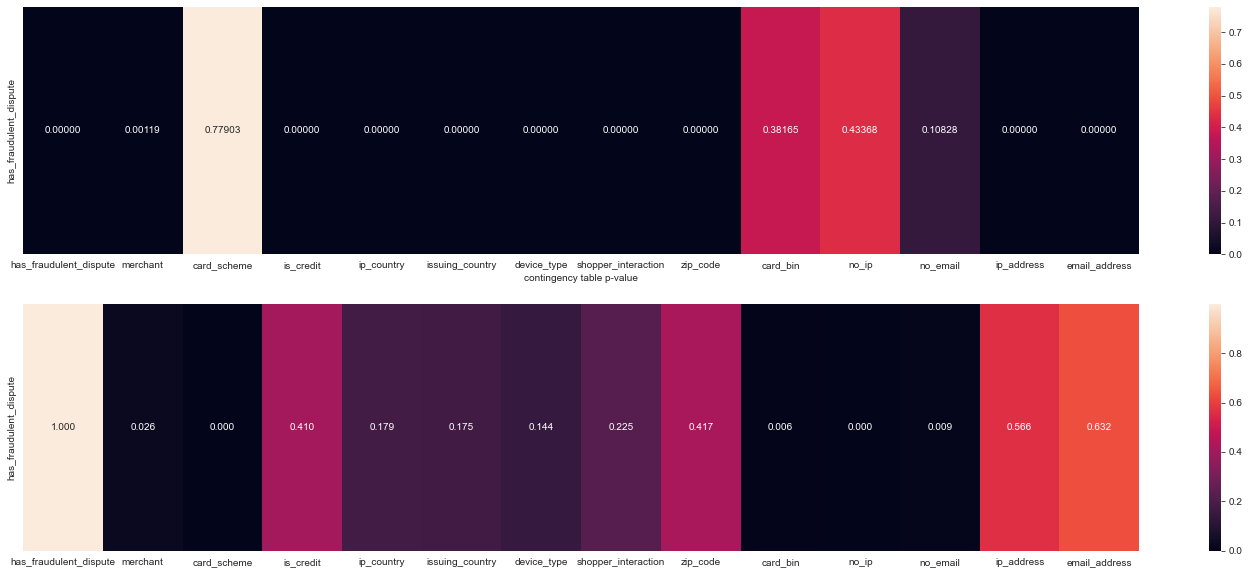

In [7]:
%reload_ext autoreload
from lib.correlation import cramers_v

cramerv = pd.DataFrame(index=['has_fraudulent_dispute'], columns=df_categorical.columns)
cramerv_sig = cramerv.copy()
columns = df_categorical.columns
for j in range(0, len(columns)):
    v, p = cramers_v(df_categorical['has_fraudulent_dispute'].tolist(), df_categorical[columns[j]].tolist())
    cramerv_sig.loc[:, columns[j]] = p
    cramerv.loc[:, columns[j]] = v

fig, axes = plt.subplots(2,1, figsize=(25, 10))
s1 = sns.heatmap(cramerv_sig, ax=axes[0], annot=True, fmt='.5f')
s1.set(xlabel='contingency table p-value')
sns.heatmap(cramerv, ax=axes[1], annot=True, fmt='.3f')
plt.show()

Using Theil U

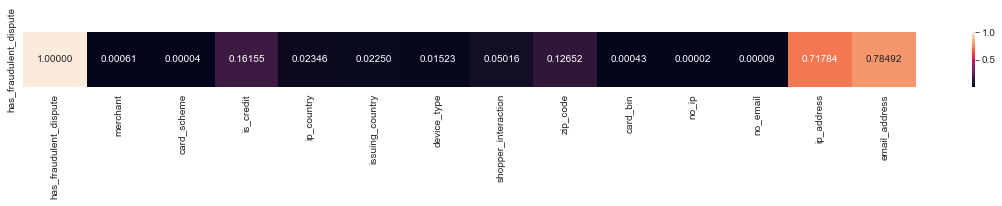

In [9]:
%reload_ext autoreload
from lib.correlation import theil_u

theilu = pd.DataFrame(index=['has_fraudulent_dispute'],columns=df_categorical.columns)
columns = df_categorical.columns
for j in range(0,len(columns)):
    u = theil_u(df_categorical['has_fraudulent_dispute'].tolist(),df_categorical[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.5f')
plt.show()

Test difference between fraud and eur_amount

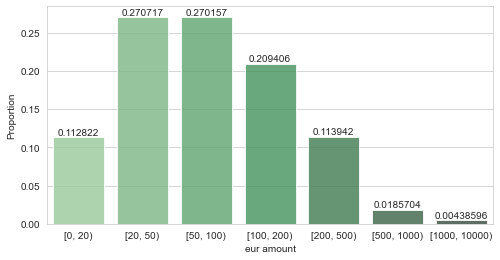

In [10]:
df_eur_amount = pd.cut( df_sample[df_sample['has_fraudulent_dispute'] == 1]['eur_amount'], [0,20,50,100,200,500,1000,10000],right=False)
value_counts = df_eur_amount.value_counts(normalize=True)
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
sns.set_color_codes("muted")
ax = sns.barplot(x=value_counts.index, y=value_counts.values,alpha=0.8,palette=("Greens_d"))
ax.set_xlabel('eur amount')
ax.set_ylabel('Proportion')
ax.bar_label(ax.containers[0])
plt.show()

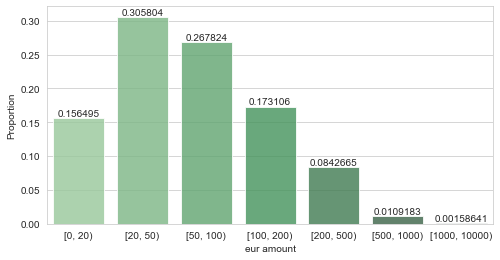

In [11]:
df_eur_amount = pd.cut( df_sample[df_sample['has_fraudulent_dispute'] == 0]['eur_amount'], [0,20,50,100,200,500,1000,10000],right=False)
value_counts = df_eur_amount.value_counts(normalize=True)
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
sns.set_color_codes("muted")
ax = sns.barplot(x=value_counts.index, y=value_counts.values,alpha=0.8,palette=("Greens_d"))
ax.set_xlabel('eur amount')
ax.set_ylabel('Proportion')
ax.bar_label(ax.containers[0])
plt.show()

In [12]:
eur_amount_fraud = df_sample[df_sample['has_fraudulent_dispute'] == 1]['eur_amount']
eur_amount_nofraud = df_sample[df_sample['has_fraudulent_dispute'] == 0]['eur_amount']
ss.ranksums(eur_amount_fraud,eur_amount_nofraud)

RanksumsResult(statistic=14.850611562870835, pvalue=6.893688818967812e-50)

WOE analysis

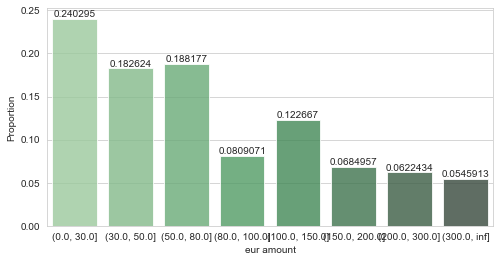

In [13]:
df_eur_amount = pd.cut( df_sample['eur_amount'], [0,30,50,80,100,150,200,300,float("inf")],right=True)
value_counts = df_eur_amount.value_counts(normalize=True)
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
sns.set_color_codes("muted")
ax = sns.barplot(x=value_counts.index, y=value_counts.values,alpha=0.8,palette=("Greens_d"))
ax.set_xlabel('eur amount')
ax.set_ylabel('Proportion')
ax.bar_label(ax.containers[0])
plt.show()

In [14]:
from lib.correlation import calculate_woe_iv
df_woe = pd.crosstab(index=df_eur_amount,columns=df_sample['has_fraudulent_dispute'])
df_woe.rename(columns={0:"neg",1:"pos"},inplace=True)
df_woe = calculate_woe_iv(df_woe)
df_woe[1] # the bigger the |WOE|, the bigger the difference we have between pos and neg, zero then random

has_fraudulent_dispute,neg,pos,pos_rate,neg_rate,woe,iv
eur_amount,,,,,,
"(0.0, 30.0]",2912,2238,0.208940,0.271837,-0.263154,0.016552
"(30.0, 50.0]",2042,1872,0.174785,0.190649,-0.086878,0.001378
"(50.0, 80.0]",2019,2014,0.188037,0.188503,-0.002478,0.000001
"(80.0, 100.0]",851,883,0.082493,0.079507,0.036871,0.000110
"(100.0, 150.0]",1210,1419,0.132512,0.113009,0.159210,0.003105
"(150.0, 200.0]",645,823,0.076894,0.060284,0.243371,0.004043
"(200.0, 300.0]",589,745,0.069616,0.055058,0.234603,0.003415
"(300.0, inf]",448,722,0.067469,0.041900,0.476386,0.012181


In [15]:
# if logistic regression, then iv is useful, otherwise not useful
iv = df_woe[0]
iv # very weak predictor

0.0407848387701092

Eur_Amounts not useful if we use logistic regression, but for other classification methods could be useful

PCA 降维可视化

In [16]:
from category_encoders import WOEEncoder, CatBoostEncoder

# one hot encoding
df_categorical_dummies  = df_categorical.copy()[['has_fraudulent_dispute']]
credit_dummies = pd.get_dummies(df_categorical.is_credit, prefix='credit')
ip_country_dummies = pd.get_dummies(df_categorical.ip_country, prefix='ip_country')
issuing_country_dummies = pd.get_dummies(df_categorical.issuing_country, prefix='issuing_country')
device_type_dummies = pd.get_dummies(df_categorical.device_type, prefix='device_type')
shopper_interaction_dummies = pd.get_dummies(df_categorical.shopper_interaction, prefix='shopper_interaction')
zip_code_dummies = pd.get_dummies(df_categorical.zip_code, prefix='zip_code')


# woe encoding
enc1 = WOEEncoder()
ip_address_dummies = enc1.fit_transform(X=df_categorical.ip_address, y=df_categorical.has_fraudulent_dispute.values.tolist())
enc2 = WOEEncoder()
email_address_dummies = enc2.fit_transform(X=df_categorical.email_address, y=df_categorical.has_fraudulent_dispute.values.tolist())

# catboost encoding not good
# enc3 = CatBoostEncoder()
# ip_address_dummies = enc3.fit_transform(X=df_categorical.ip_address, y=df_categorical.has_fraudulent_dispute.values.tolist())
# enc4= CatBoostEncoder()
# email_address_dummies = enc4.fit_transform(X=df_categorical.email_address, y=df_categorical.has_fraudulent_dispute.values.tolist())


# df_categorical_dummies = pd.concat([df_categorical_dummies,credit_dummies,ip_country_dummies,issuing_country_dummies,device_type_dummies,shopper_interaction_dummies,ip_address_dummies,email_address_dummies], axis=1)

df_categorical_dummies = pd.concat([df_categorical_dummies,credit_dummies,zip_code_dummies, ip_address_dummies,email_address_dummies], axis=1)
df_categorical_dummies.head()

from lib.preprocessing import standardize
df_eur_amount_standard =  standardize(df_sample[['eur_amount']])

df_dummies = pd.concat([df_categorical_dummies,df_eur_amount_standard], axis=1)
df_dummies.head()

,has_fraudulent_dispute,credit_False,credit_True,zip_code_1093,zip_code_1104,zip_code_2039,zip_code_3941,zip_code_AAD,zip_code_BB,zip_code_BZD,...,zip_code_EB,zip_code_EGHA,zip_code_FFR,zip_code_FGDD,zip_code_XDED,zip_code_XOL,zip_code_ZB,ip_address,email_address,eur_amount
58381,False,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.021725,0.000000,2.897830
71885,False,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.021725,0.000000,-0.109002
7458,False,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.021725,-1.098612,0.546449
72334,False,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.000000,0.000000,-0.480880
9332,False,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,-1.098612,-1.098612,0.411276


If we take into account the eur_amount, we see much noise than without it.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.4603237  0.21582087]
['credit_False' 'zip_code_2039' 'zip_code_ZB' 'zip_code_FGDD'
 'zip_code_FFR' 'zip_code_1093' 'zip_code_EB' 'zip_code_EGHA'
 'zip_code_DB' 'zip_code_DFFF' 'zip_code_XOL' 'zip_code_3941'
 'zip_code_AAD' 'zip_code_BB' 'zip_code_XDED' 'zip_code_1104'
 'zip_code_BZD' 'credit_True' 'eur_amount' 'ip_address' 'email_address']


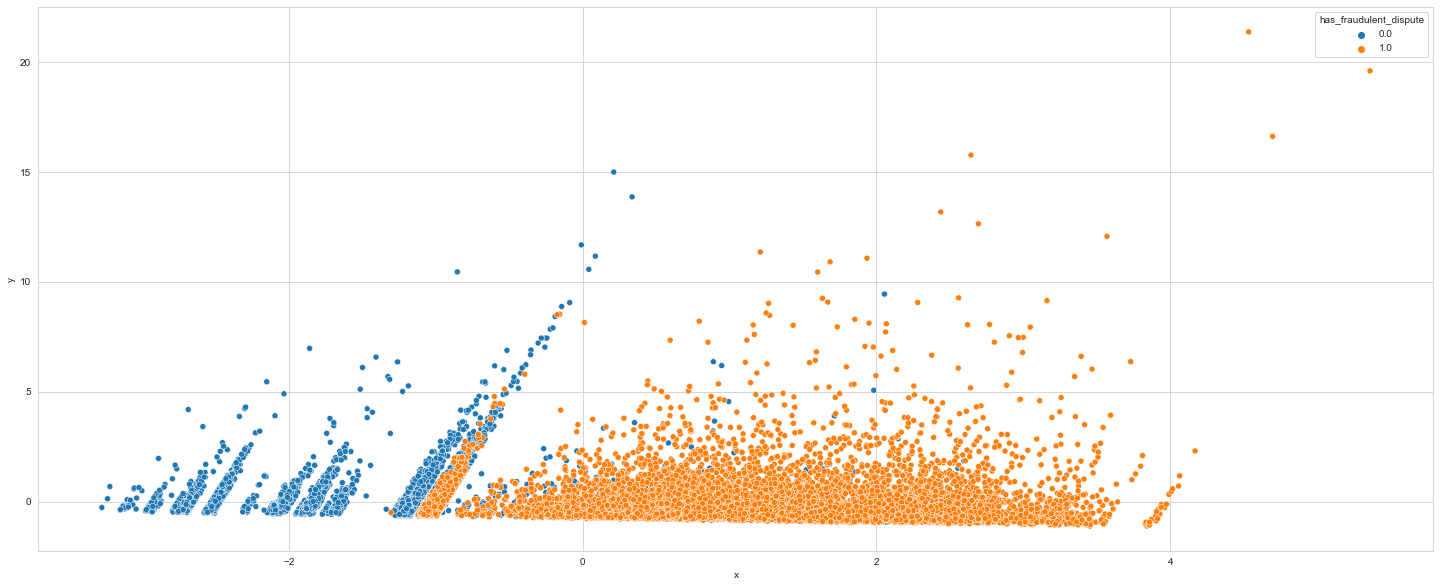

In [17]:
# with eur_amount
%load_ext autoreload
%autoreload
from lib.visualization import DrawPCA

drawPCA = DrawPCA(df=df_dummies,target="has_fraudulent_dispute",n_components=2)
drawPCA.draw()
print(drawPCA.pca.explained_variance_ratio_)
print(drawPCA.pca.feature_names_in_[drawPCA.pca.components_[0].argsort()])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.4603237  0.21582087 0.1010114 ]
['credit_False' 'zip_code_2039' 'zip_code_ZB' 'zip_code_FGDD'
 'zip_code_FFR' 'zip_code_1093' 'zip_code_EB' 'zip_code_EGHA'
 'zip_code_DB' 'zip_code_DFFF' 'zip_code_XOL' 'zip_code_3941'
 'zip_code_AAD' 'zip_code_BB' 'zip_code_XDED' 'zip_code_1104'
 'zip_code_BZD' 'credit_True' 'eur_amount' 'ip_address' 'email_address']


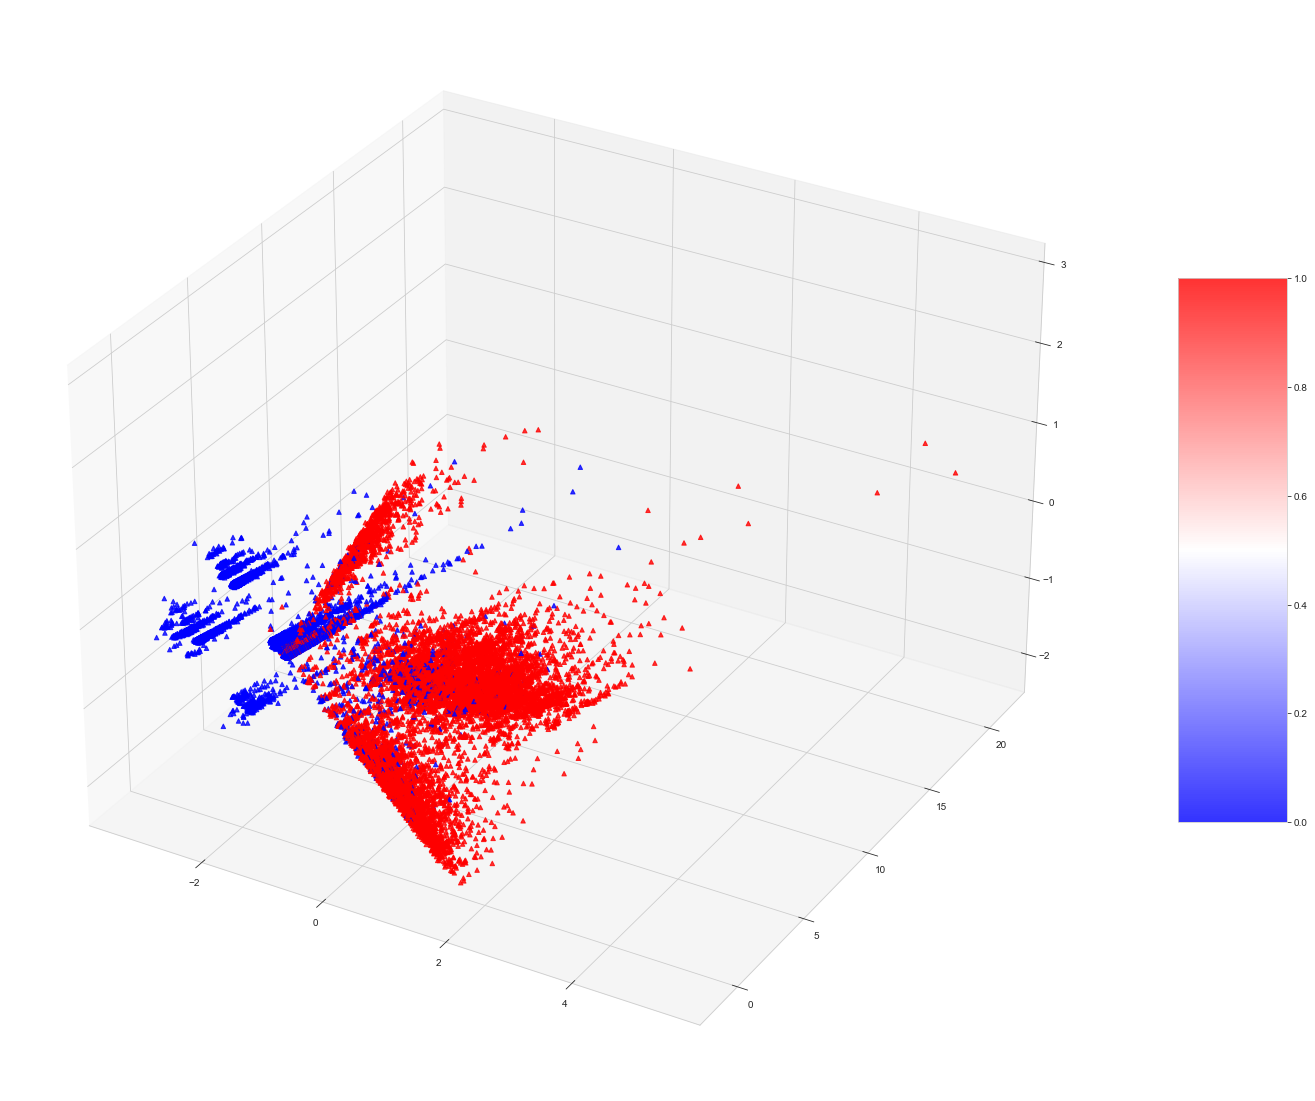

In [18]:
%load_ext autoreload
%autoreload
from lib.visualization import DrawPCA

drawPCA = DrawPCA(df=df_dummies,target="has_fraudulent_dispute",n_components=3)
drawPCA.draw()
print(drawPCA.pca.explained_variance_ratio_)
print(drawPCA.pca.feature_names_in_[drawPCA.pca.components_[0].argsort()])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.5857998  0.12919767]
['credit_False' 'zip_code_2039' 'zip_code_ZB' 'zip_code_FGDD'
 'zip_code_FFR' 'zip_code_1093' 'zip_code_EB' 'zip_code_EGHA'
 'zip_code_DB' 'zip_code_DFFF' 'zip_code_XOL' 'zip_code_3941'
 'zip_code_AAD' 'zip_code_BB' 'zip_code_XDED' 'zip_code_1104'
 'zip_code_BZD' 'credit_True' 'ip_address' 'email_address']


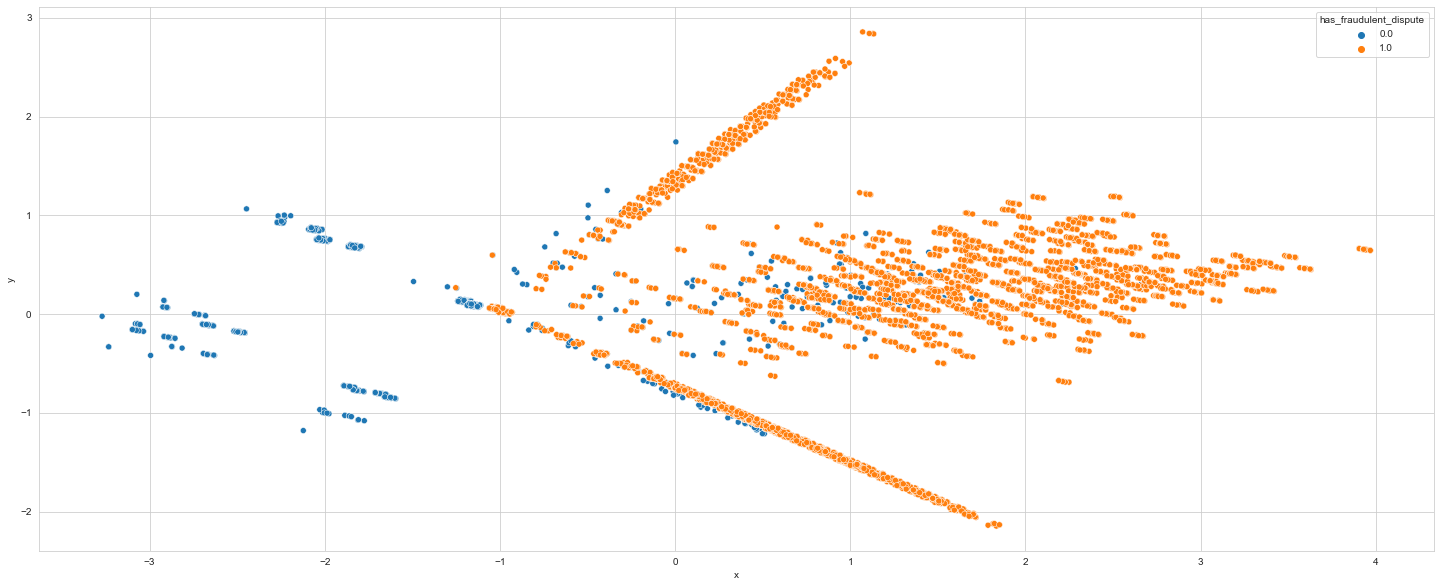

In [19]:
# without eur_amount
%load_ext autoreload
%autoreload
from lib.visualization import DrawPCA

drawPCA = DrawPCA(df=df_categorical_dummies,target="has_fraudulent_dispute",n_components=2)
drawPCA.draw()
print(drawPCA.pca.explained_variance_ratio_)
print(drawPCA.pca.feature_names_in_[drawPCA.pca.components_[0].argsort()])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.5857998  0.12919767 0.06015624]
['credit_False' 'zip_code_2039' 'zip_code_ZB' 'zip_code_FGDD'
 'zip_code_FFR' 'zip_code_1093' 'zip_code_EB' 'zip_code_EGHA'
 'zip_code_DB' 'zip_code_DFFF' 'zip_code_XOL' 'zip_code_3941'
 'zip_code_AAD' 'zip_code_BB' 'zip_code_XDED' 'zip_code_1104'
 'zip_code_BZD' 'credit_True' 'ip_address' 'email_address']


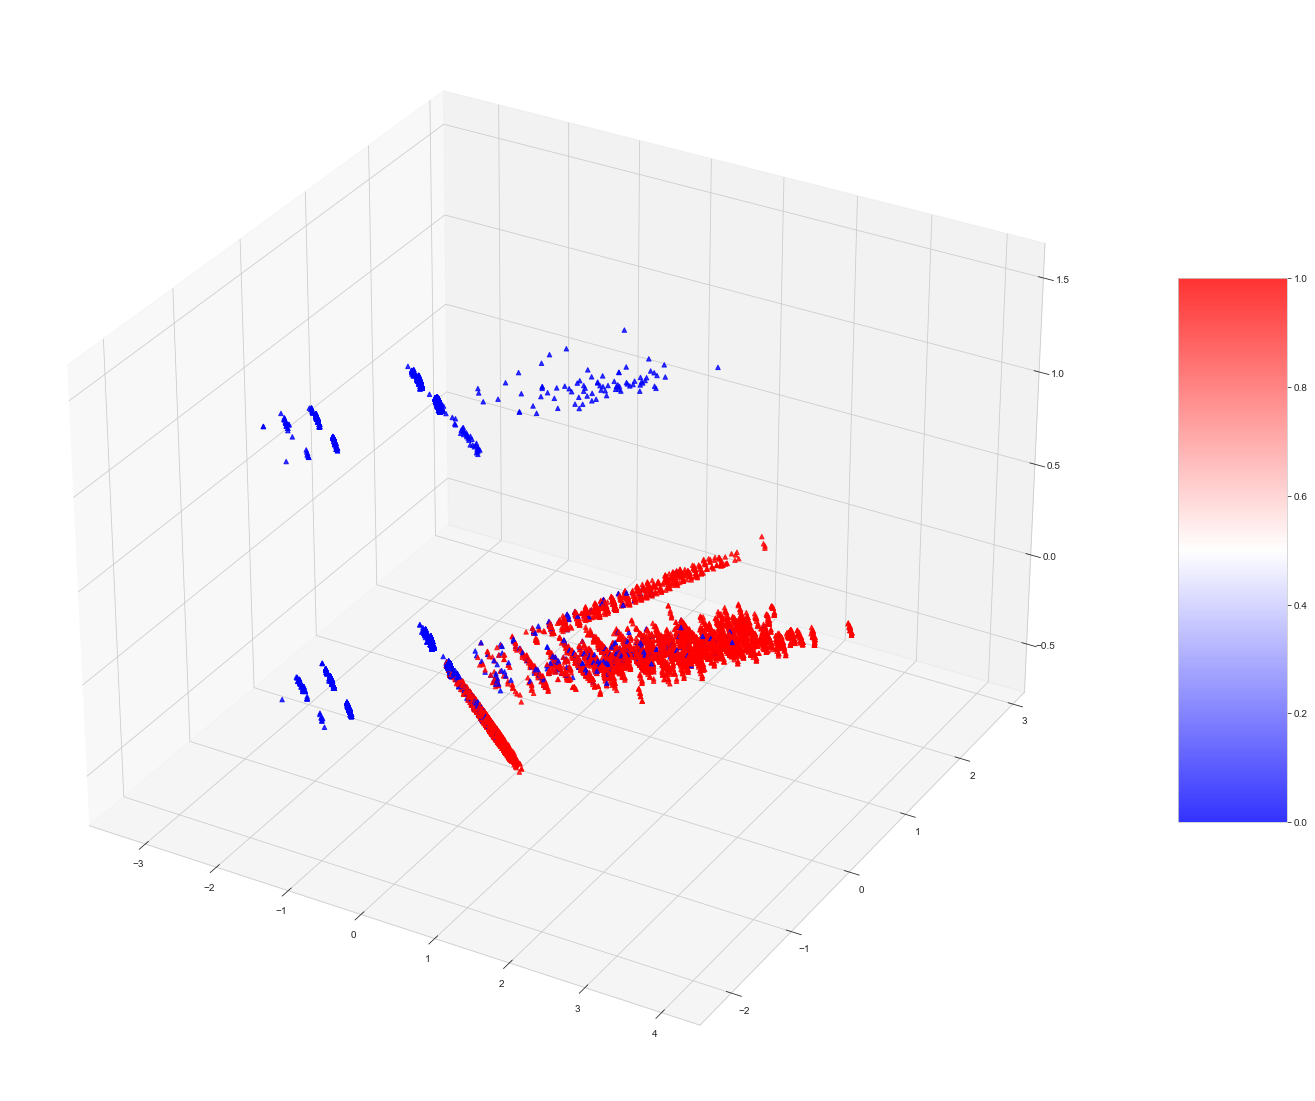

In [20]:
%load_ext autoreload
%autoreload
from lib.visualization import DrawPCA

drawPCA = DrawPCA(df=df_categorical_dummies,target="has_fraudulent_dispute",n_components=3)
drawPCA.draw()
print(drawPCA.pca.explained_variance_ratio_)
print(drawPCA.pca.feature_names_in_[drawPCA.pca.components_[0].argsort()])